# Telecom Customer Churn Analysis

    1. Domain Exploration
        - Understand the buiness process
        - Identify common challenges, business beleifs, losses, solutions, data flow

    2. Data Collection and Data Exploration
        - Collect data from multiple verticals in business, prepare a dataset
        - perform general data exploration to understand data quality, identify common issues

    3. Data Cleaning
        - Handle missing values
        - Handle duplicate entries
        - Handle unwanted columns - identifiers
        - Handle outliers

    4. Analysis on data
        - Descriptive Analysis - analyse each variable individually
        - Exploratory Analysis - Analyse each variable with respect to the target KPI (churn)
            - Statistics methods
            - Data visualization

    5. Prepare reports to communicate the results

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Exploration

In [10]:
# load data
df = pd.read_excel(r"E:\MLIoT\ML\dataset\telecom\telecom_churn_modelling.xlsx",
                   na_values=['#','NA','--','Not Available','?'])
df.shape

(3333, 20)

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
len(df.State.unique())

51

Observations - 
    - State is a categorical attribute with 51 unique value - high cardinality
    - Voice mail plan and Number vmail messages represent relative information
    - Total xxx charge should be related/multiplier of total xxx minutes or total xxx calls
 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [7]:
df['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [8]:
df['International plan'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
df['Voice mail plan'].unique()

array(['Yes', 'No'], dtype=object)

# Data Cleaning

In [11]:
# check for duplicate entries
df.duplicated().sum()

0

In [12]:
#check for missing values
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [13]:
# check for unwanted columns - identifiers
# need to analyse - State

In [14]:
# check for outliers
df.skew()

Account length            0.096606
Area code                 1.126823
Number vmail messages     1.264824
Total day minutes        -0.029077
Total day calls          -0.111787
Total day charge         -0.029083
Total eve minutes        -0.023877
Total eve calls          -0.055563
Total eve charge         -0.023858
Total night minutes       0.008921
Total night calls         0.032500
Total night charge        0.008886
Total intl minutes       -0.245136
Total intl calls          1.321478
Total intl charge        -0.245287
Customer service calls    1.091359
Churn                     2.018356
dtype: float64

# Descriptive Analysis

In [15]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [19]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### State

In [16]:
df['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
VA     77
WY     77
CT     74
VT     73
ID     73
MI     73
TX     72
UT     72
IN     71
MD     70
KS     70
MT     68
NJ     68
NC     68
NV     66
WA     66
CO     66
RI     65
MS     65
MA     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
OK     61
DE     61
NE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

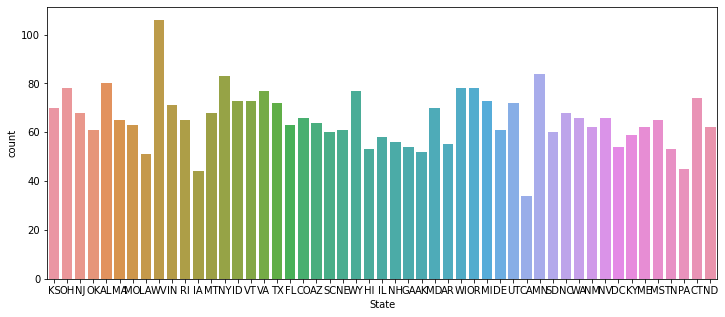

In [17]:
plt.figure(figsize=(12,5))
sns.countplot(df['State'])
plt.show()

Observation -
    - On a whole, states have some variation present in the number of customers from each state

### Analysing numeric attributes

In [20]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [21]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


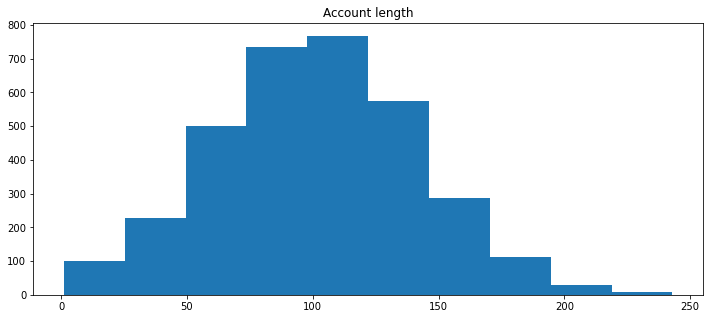

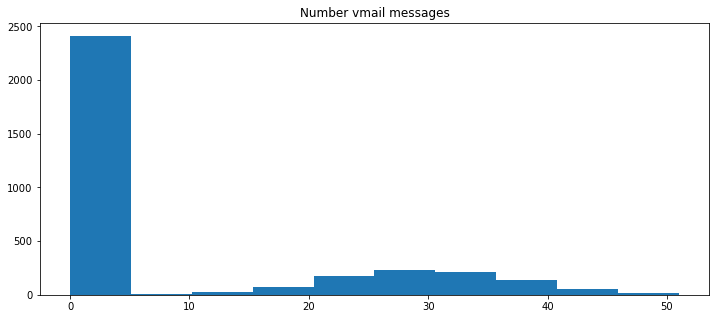

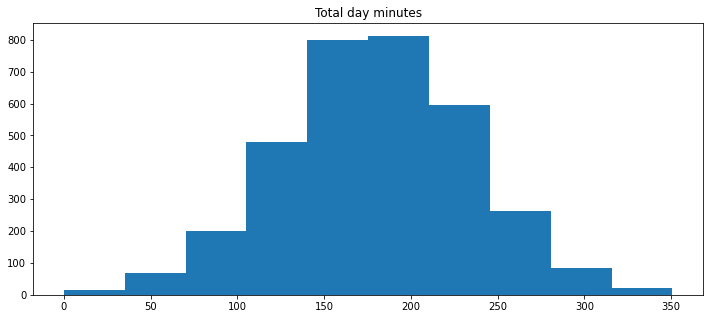

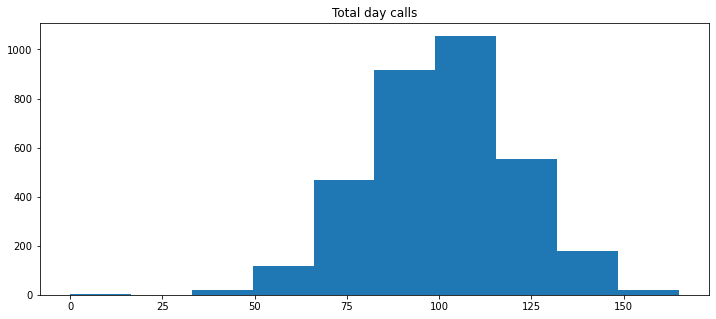

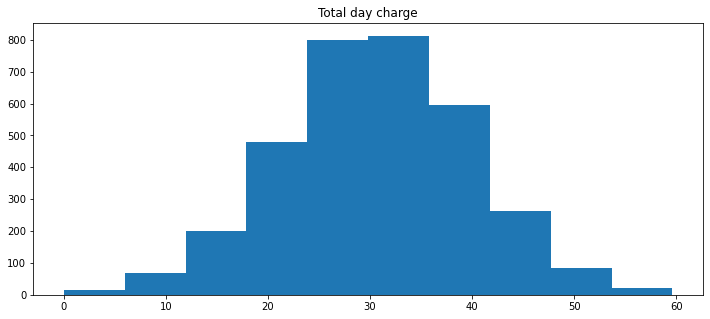

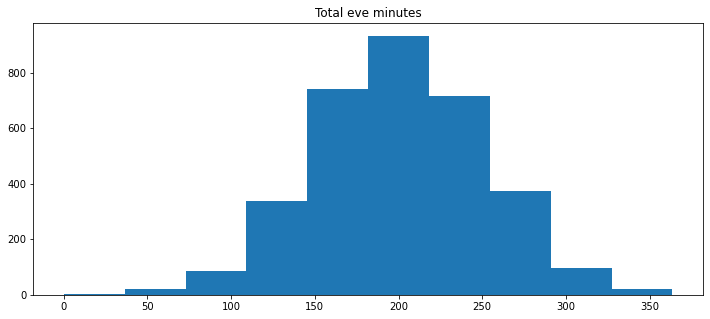

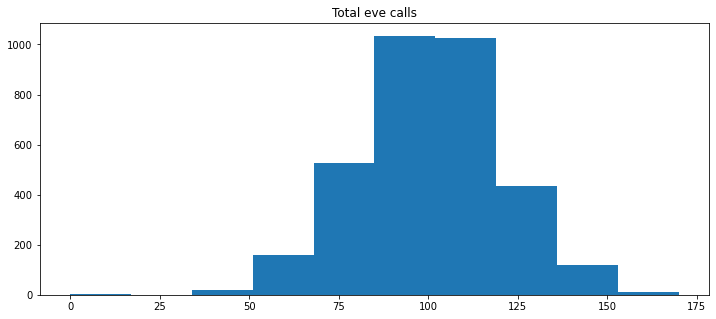

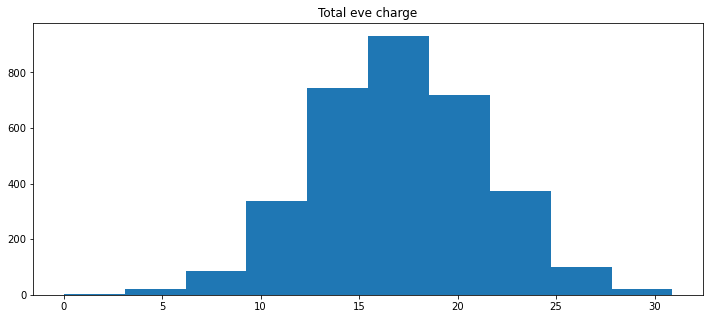

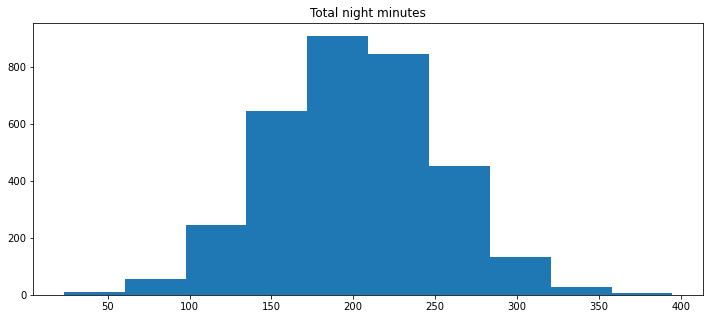

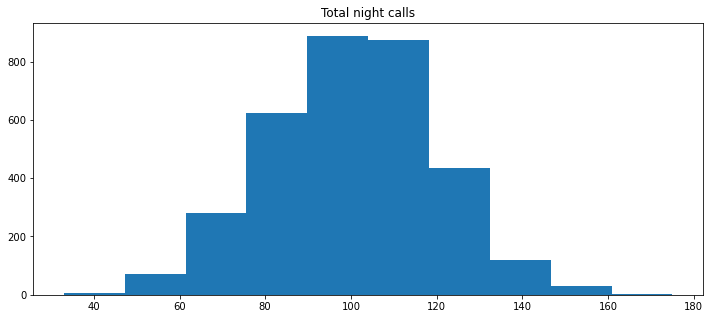

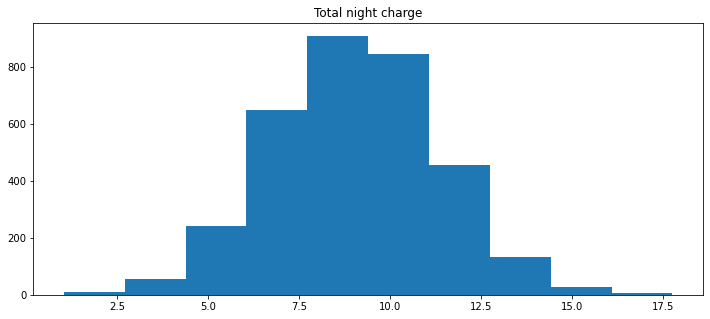

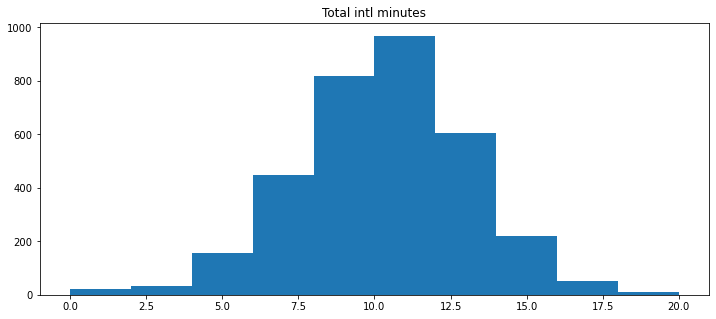

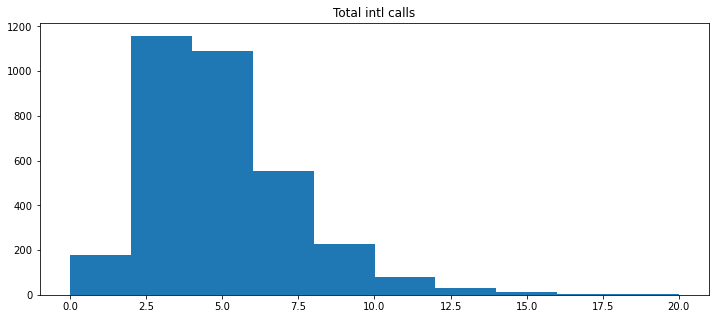

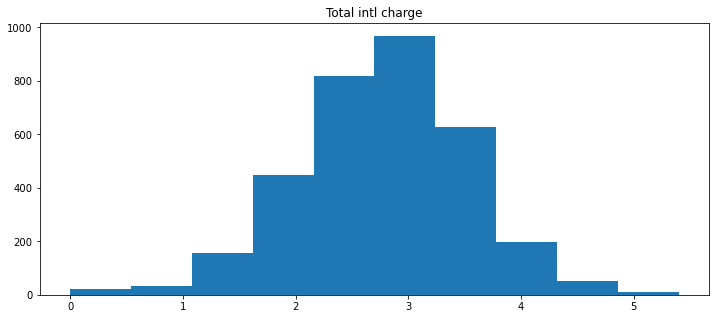

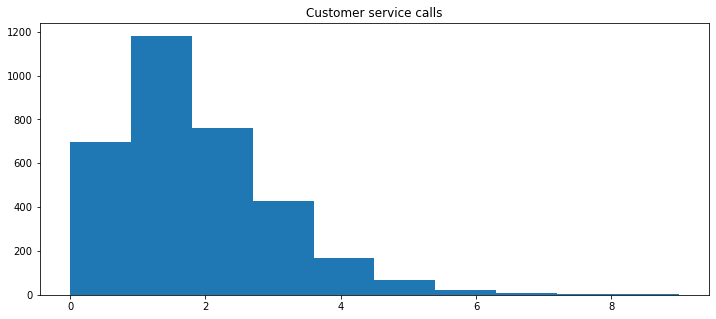

In [22]:
nums = ['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls']

for col in nums:
    plt.figure(figsize=(12,5))
    plt.hist(df[col])
    plt.title(col)
    plt.show()

Observations - 
    - total xxx minutes seems to be correlated to total xxx charge
    - customer service calls, total intl calls, total day calls, total eve calls, seems to have outliers
    - Number of vmail messages seems to have multimodal distribution

In [24]:
cats = ['State','Area code', 'International plan',
       'Voice mail plan','Churn']

WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
VA     77
WY     77
CT     74
VT     73
ID     73
MI     73
TX     72
UT     72
IN     71
MD     70
KS     70
MT     68
NJ     68
NC     68
NV     66
WA     66
CO     66
RI     65
MS     65
MA     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
OK     61
DE     61
NE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64


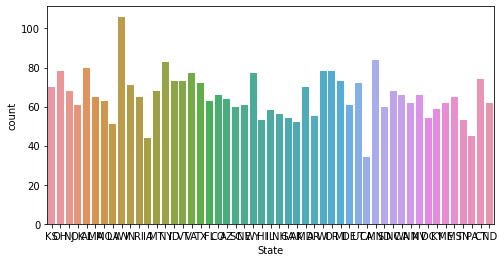

415    1655
510     840
408     838
Name: Area code, dtype: int64


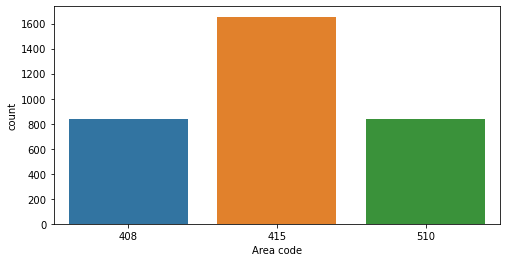

No     3010
Yes     323
Name: International plan, dtype: int64


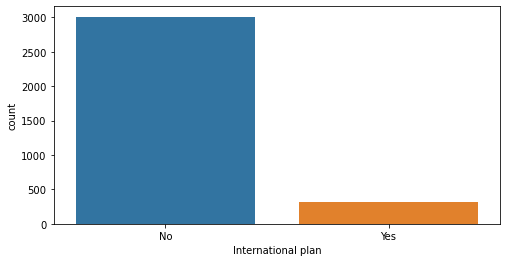

No     2411
Yes     922
Name: Voice mail plan, dtype: int64


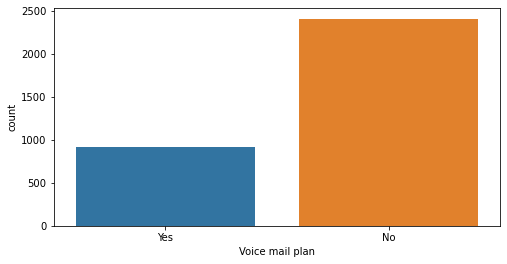

False    2850
True      483
Name: Churn, dtype: int64


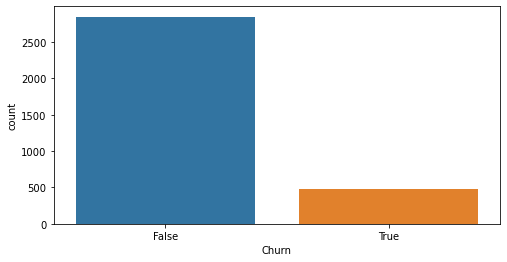

In [25]:
for col in cats:
    print(df[col].value_counts())
    
    plt.figure(figsize=(8,4))
    sns.countplot(df[col])
    plt.show()

Observation - 
    - Area Code - Almost half of customers are from area code 415, rest 1/4 from each area code
    - International Plan - almost 90% of customers do not have international plans
    - Approx 30% of customers have opted for voice mail plan
    - Churn - almost 14% of customers have left the telecom company